In [1]:
import pandas as pd
import numpy as np

from importlib import reload

# import plotly
# import plotly.graph_objs as go
%matplotlib inline

In [2]:
import gameplan as gp
from gameplan.portfolio import Portfolio

In [3]:
s = gp.income_streams.Salary(
    paycheck_amt=180000/26, 
    payday_freq='2W-Fri', 
    tax_rate=0.35, 
    growth_start_dt='2020-06-01',
)
existing_401k = gp.assets.Equity(init_value=43014+29124 + 12785 +(173153 + 36567 + 4995 + 1200))
# investments = gp.assets.Equity(init_value=173153 + 36567 + 4995 + 1200)

port = Portfolio(initial_cash_savings=42000, interest_rate=0.005)
port.add_income_stream(s, label='salary', if_exists='overwrite')
port.add_asset(existing_401k, label='401k', if_exists='overwrite')
# port.add_asset(investments, label='investments', if_exists='overwrite')


In [4]:
port.add_401k_contribution(
    income_stream_label='salary', 
    contrib_pct=0.1, 
    employer_match=dict(upto=0, pct_match=0),
    label='401k'
)

/Users/davidbrodsky/repos/gameplan/gameplan/gp_collections.py:114: UserWarning: This Collection is empty.
  if warn: warnings.warn('This Collection is empty.')


In [5]:
# # need to incorporate growth here
# port.add_pretax_expense(
#     from_income_stream_label='salary',
#     amt=180/2, 
#     label='health_insurance',
#     if_exists='overwrite'
# )
port.add_pretax_expense('salary', label='HSA', amt=291.66/2, if_exists='overwrite')
port.add_pretax_expense('salary', label='travel', amt=127/2, if_exists='overwrite')

/Users/davidbrodsky/repos/gameplan/gameplan/gp_collections.py:43: UserWarning: Label 'cash_inflows' already exists. Will overwrite.
  warnings.warn(warning_message)


/Users/davidbrodsky/.pyenv/versions/3.7.3/envs/db_env/lib/python3.7/site-packages/scipy/optimize/minpack.py:799: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/davidbrodsky/repos/gameplan/gameplan/gp_collections.py:43: UserWarning: Label 'cash_outflows' already exists. Will overwrite.
  warnings.warn(warning_message)


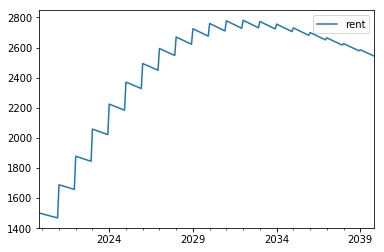

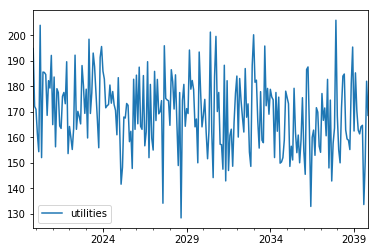

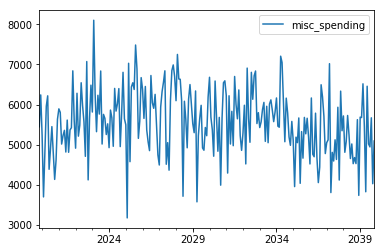

In [6]:
r=gp.expenses.Rent(
    amount=1500, 
    start_dt='2019-11-01', 
    growth_start_dt='2020-01-01', 
)
misc = gp.expenses.MiscellaneousExpenses(amount=5000, start_dt='2019-10-30')
utilities = gp.expenses.Utilities(amount=175, local_vol=0.08, start_dt='2019-11-01')

expenses = [r, utilities, misc]

for exp in expenses:
    port.add_expense(
        expense=exp,
        if_exists='overwrite'
    )
    exp.cash_flows_df.plot()

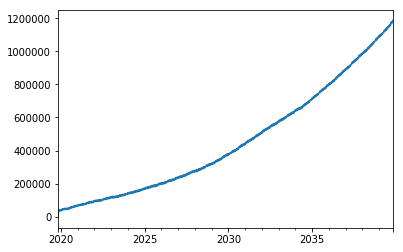

In [7]:
port.cash_savings.plot()

In [14]:
ac = port.all_cashflows

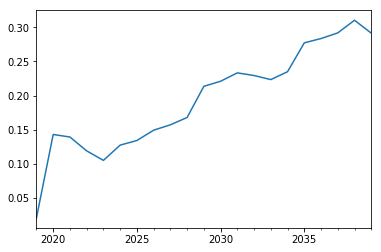

In [22]:
(port.net_cashflows.resample('Y').sum()/port.income_streams.total.resample('Y').sum()).plot()

In [26]:
range(35, 0, 1)

range(35, 0)

In [36]:
df = pd.DataFrame(index=list(range(35, 0, -1)), columns=['salary', 'savings_%', 'savings_$', 'discount_rate', 'NPV'])

In [39]:
import plotly_express as px

In [ ]:
px.scatter_3d()

In [42]:
disc_rates = np.arange(0.0, 0.1, 0.005)
growth_rates = np.arange(0.0, 0.05, 0.005)
savings_rate = 0.15
salary = 180000

In [41]:
disc_rates

array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095])

In [ ]:
for disc in np.arange()
np.npv()

In [37]:
df

,salary,savings_%,savings_$,discount_rate,NPV
35,NaN,NaN,NaN,NaN,NaN
34,NaN,NaN,NaN,NaN,NaN
33,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN
31,NaN,NaN,NaN,NaN,NaN
30,NaN,NaN,NaN,NaN,NaN
29,NaN,NaN,NaN,NaN,NaN
28,NaN,NaN,NaN,NaN,NaN
27,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN,NaN


In [11]:
port.income_streams.contents['salary'].paycheck_df

,salary,total_deductions,total_taxes,take_home_salary
2019-11-08,6923.076923,-901.637692,-2107.503731,3913.935500
2019-11-22,6917.823966,-901.637692,-2105.665196,3910.521078
2019-12-06,6912.574994,-901.637692,-2103.828056,3907.109246
2019-12-20,6907.330005,-901.637692,-2101.992309,3903.700003
2020-01-03,6902.088996,-901.637692,-2100.157956,3900.293347
2020-01-17,6896.851963,-901.637692,-2098.324995,3896.889276
2020-01-31,6891.618904,-901.637692,-2096.493424,3893.487787
2020-02-14,6886.389815,-901.637692,-2094.663243,3890.088880
2020-02-28,6881.164695,-901.637692,-2092.834451,3886.692552
2020-03-13,6875.943539,-901.637692,-2091.007046,3883.298800


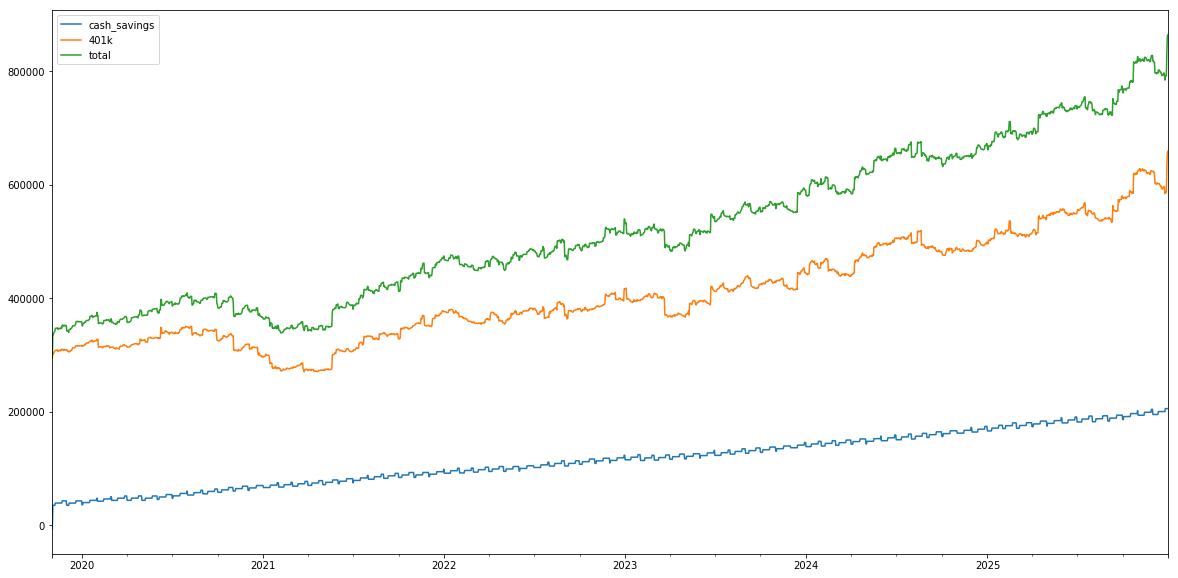

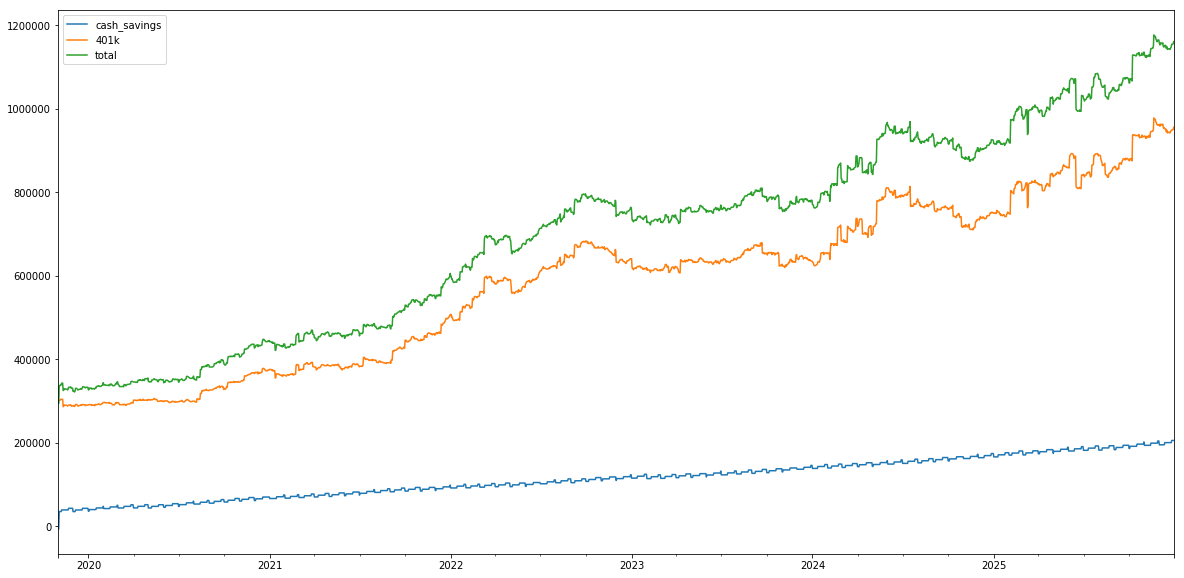

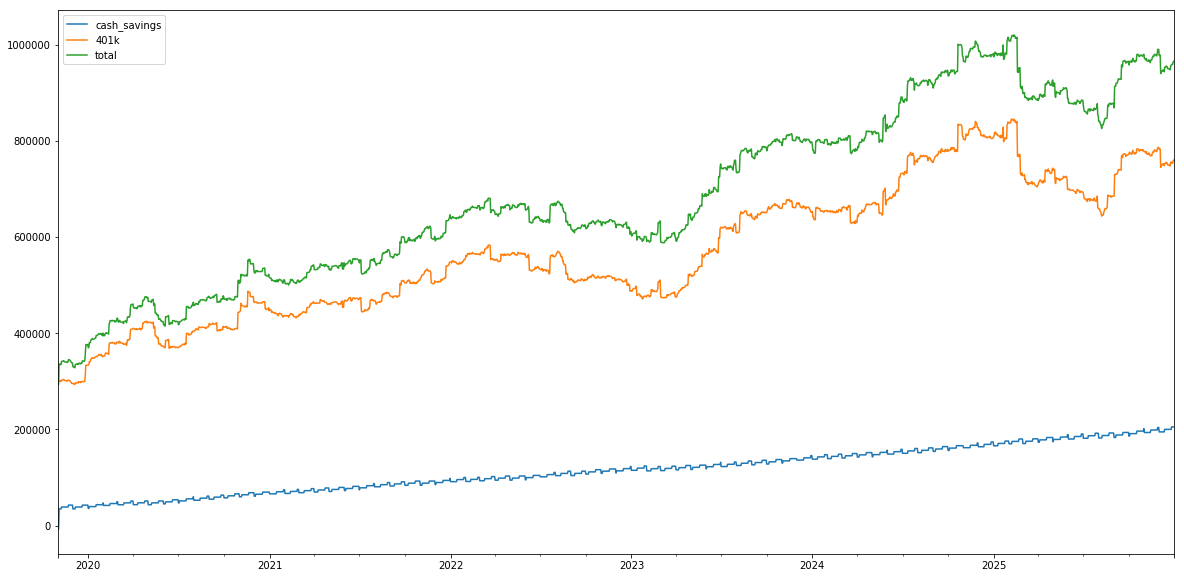

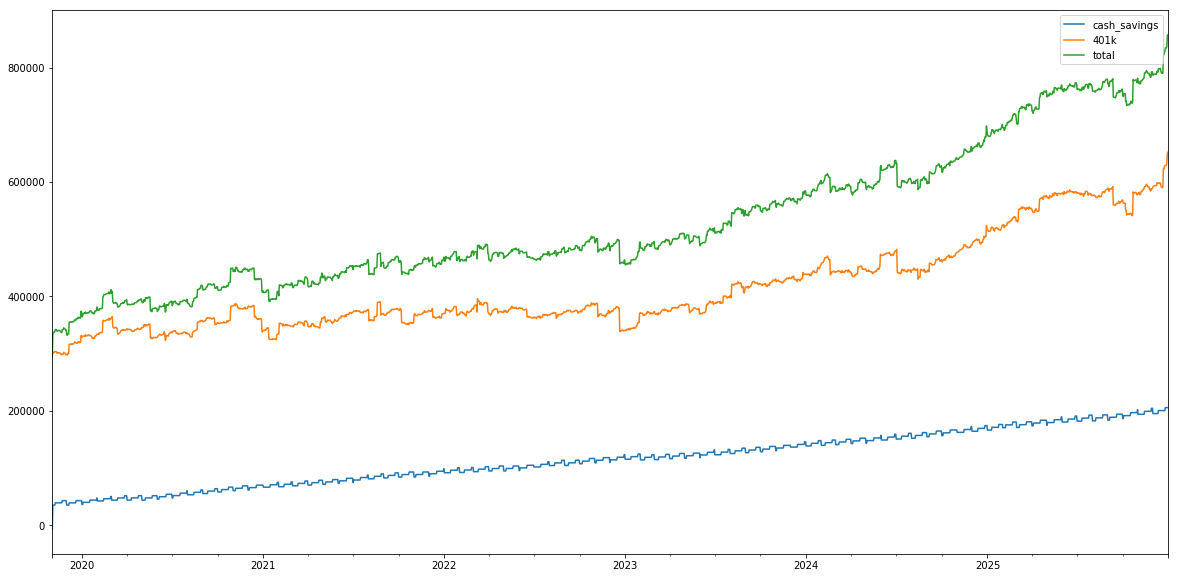

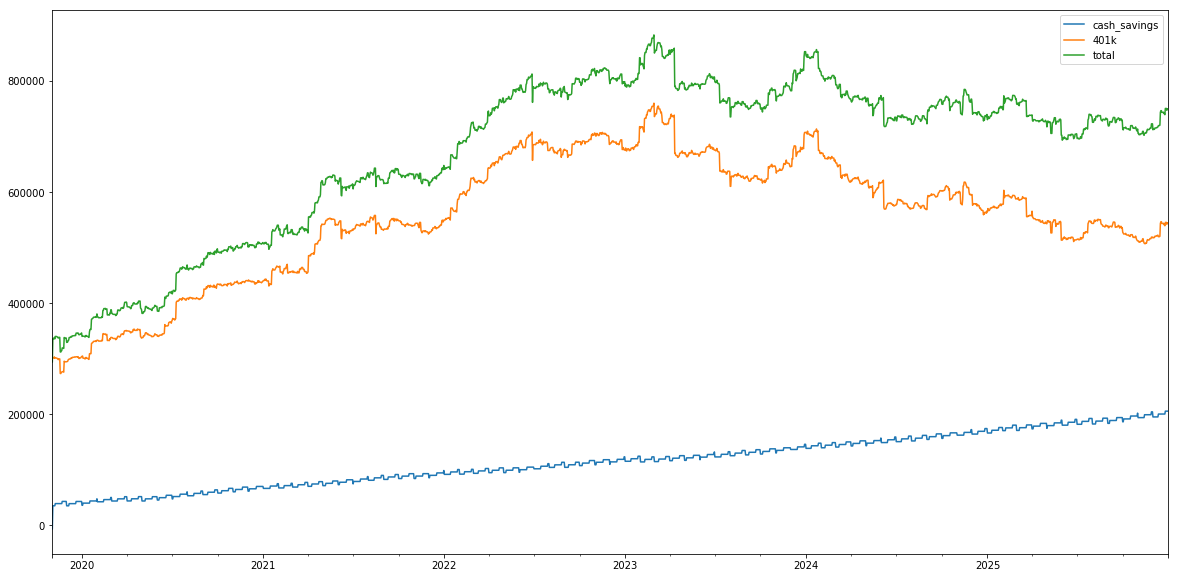

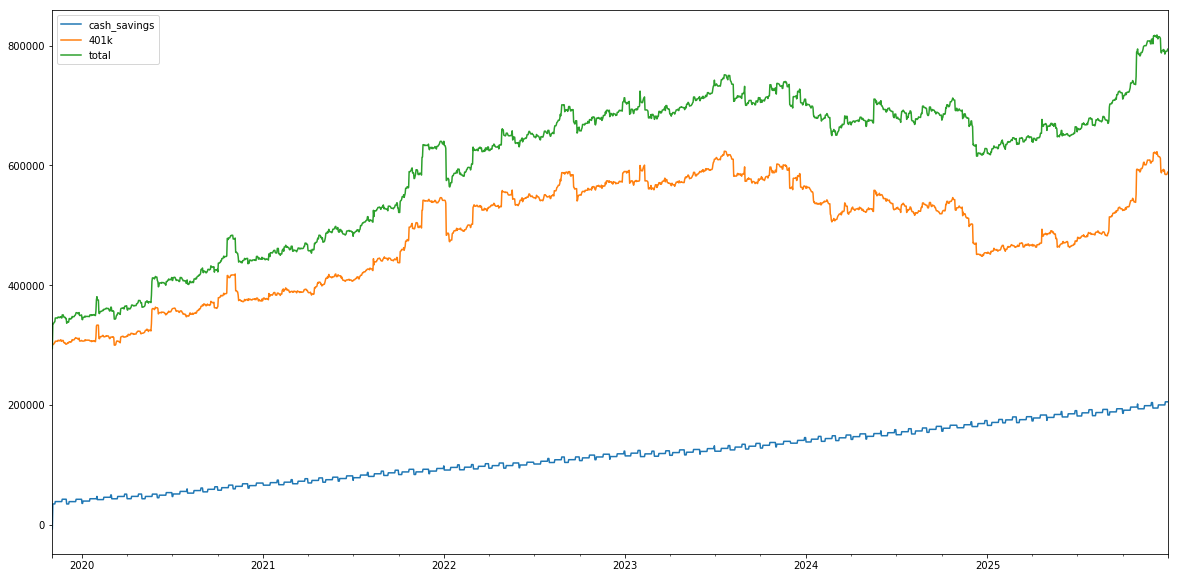

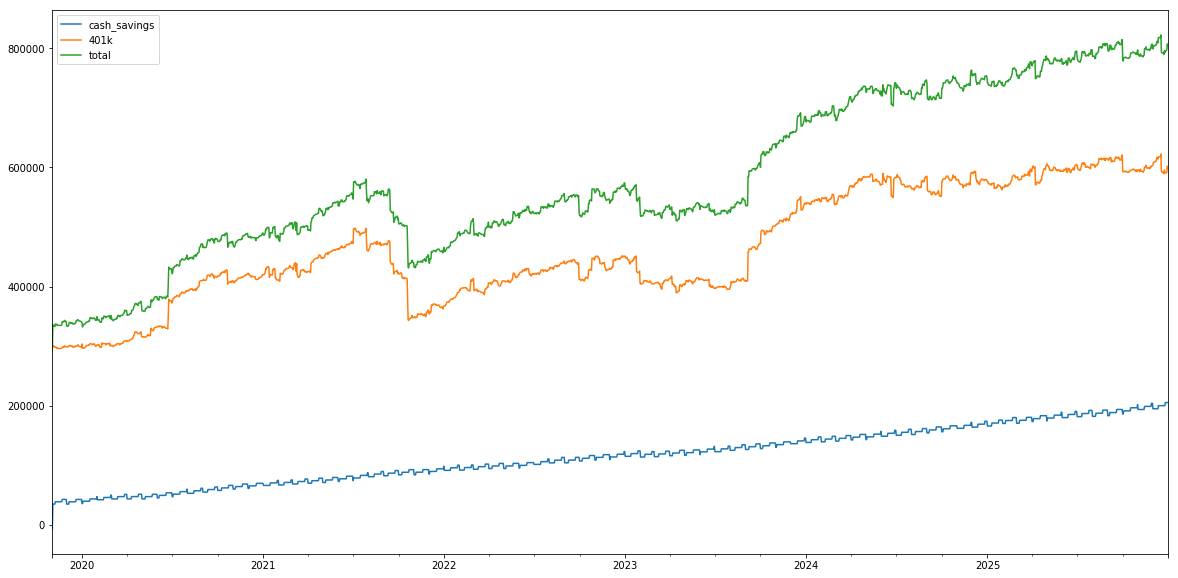

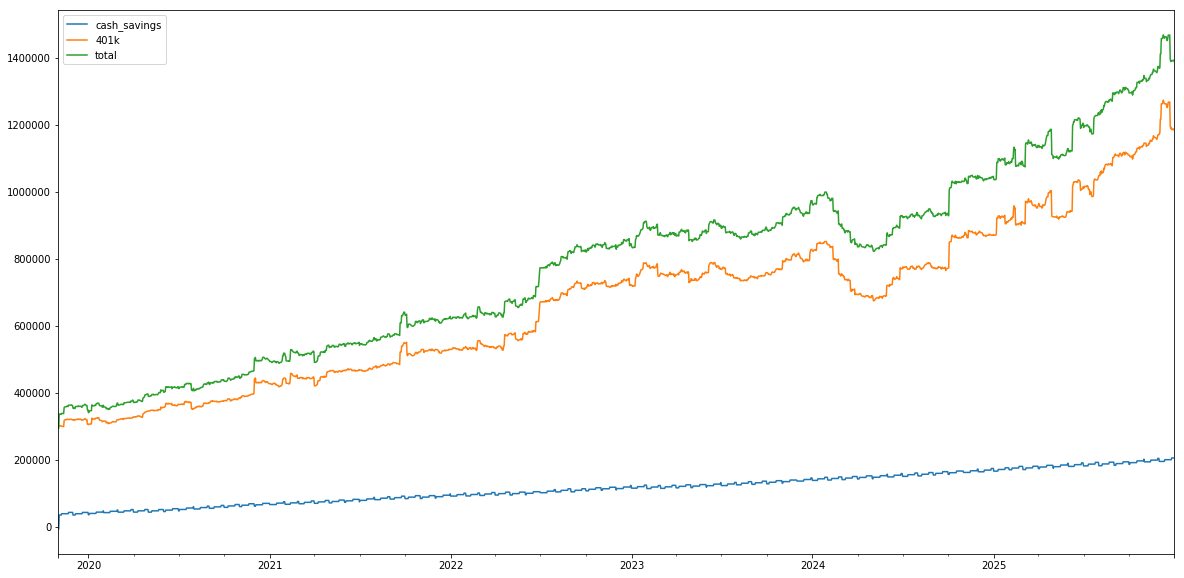

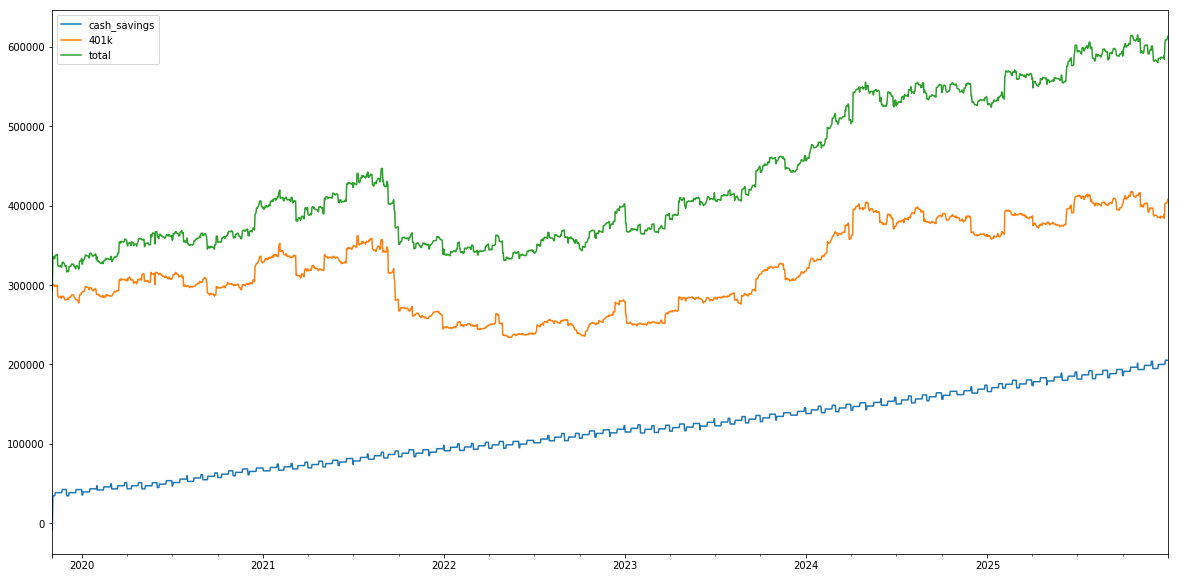

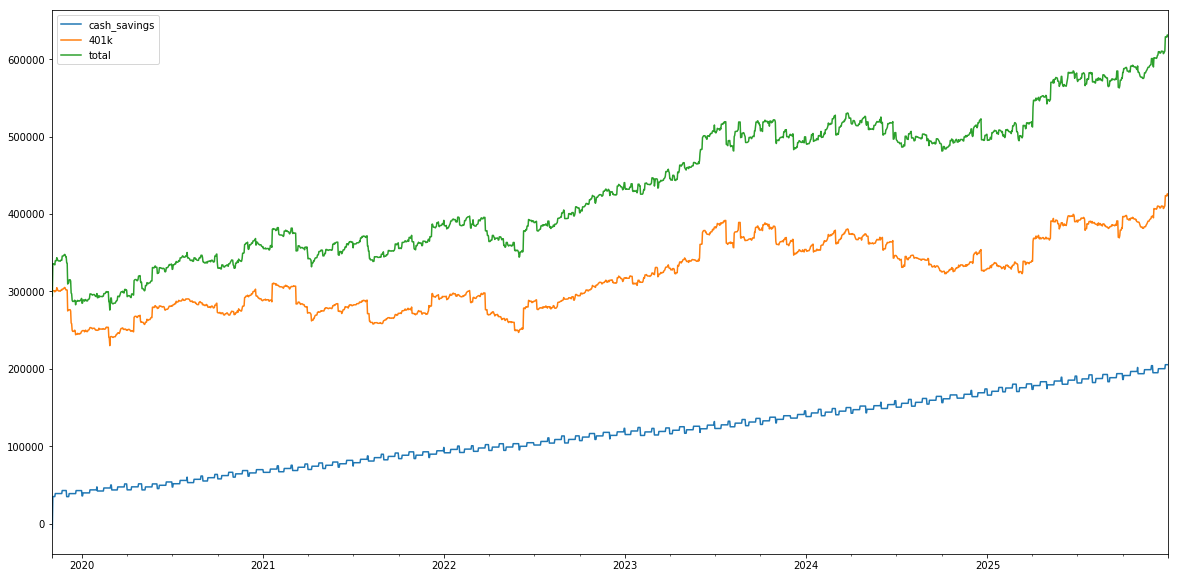

In [8]:
for x in range(10):
    port.assets.generate_path_df()[:'2025'].plot(figsize=(20, 10))

/Users/davidbrodsky/repos/gameplan/gameplan/gp_collections.py:114: UserWarning: This Collection is empty.
  if warn: warnings.warn('This Collection is empty.')


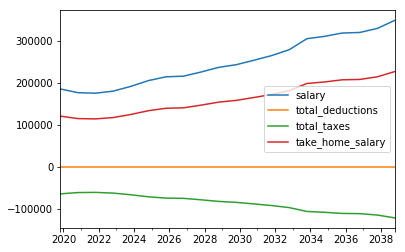

In [86]:
s.paycheck_df.resample('365d').sum().plot()

In [29]:
s.cash_flows_df.head()

,salary
2019-10-25,6923.076923
2019-11-08,6917.823966
2019-11-22,6912.574994
2019-12-06,6907.330005
2019-12-20,6902.088996


In [30]:
existing_401k.credits_and_debits.as_df

,initial_balance,total_net_cash_flow
2019-10-20,45000,45000


In [47]:
port.income_streams.contents['salary'].

'2W-Fri'

In [51]:
port.income_streams.contents['salary'].paycheck_df.head()

,salary,total_deductions,total_taxes,take_home_salary
2019-10-25,6923.076923,-714.714615,-2328.135865,3880.226442
2019-11-08,6917.823966,-714.714615,-2326.166006,3876.943344
2019-11-22,6912.574994,-714.714615,-2324.197642,3873.662737
2019-12-06,6907.330005,-714.714615,-2322.230771,3870.384618
2019-12-20,6902.088996,-714.714615,-2320.265393,3867.108988


In [52]:
port.income_streams.contents['salary'].paycheck_df.tail()

,salary,total_deductions,total_taxes,take_home_salary
2039-08-19,12074.710254,-714.714615,-4259.998364,7099.997274
2039-09-02,12065.548440,-714.714615,-4256.562684,7094.271141
2039-09-16,12056.393579,-714.714615,-4253.129611,7088.549352
2039-09-30,12047.245663,-714.714615,-4249.699143,7082.831905
2039-10-14,12038.104689,-714.714615,-4246.271277,7077.118796


In [53]:
port.income_streams.contents['salary'].take_home_salary.resample('365D').sum().divide(12).multiply(0.33)

2019-10-25    2860.957518
2020-10-24    2813.353379
2021-10-24    2905.904964
2022-10-24    2898.064977
2023-10-24    2958.447317
2024-10-23    3062.644166
2025-10-23    3138.873598
2026-10-23    3240.765688
2027-10-23    3374.521352
2028-10-22    3474.421825
2029-10-22    3497.824201
2030-10-22    3571.713705
2031-10-22    3726.949301
2032-10-21    3908.378744
2033-10-21    4268.619708
2034-10-21    4253.114235
2035-10-21    4357.713106
2036-10-20    4606.803804
2037-10-20    4725.426088
2038-10-20    4813.423956
Freq: 365D, Name: take_home_salary, dtype: float64

In [ ]:
port.income_streams.as_df.multiply(26).plot()

In [ ]:
port.assets.generate_path_df()[:'2030'].plot(figsize=(24,12))

In [ ]:
port.assets.generate_path_df().plot(figsize=(24,12))

In [ ]:
port.assets.generate_path_df().plot(figsize=(24,12))

In [ ]:
port.expenses.agg_cash_flows('M').multiply(-1).plot(figsize=(24,12))

In [54]:
port.all_cashflows

In [55]:
a = port.all_cashflows

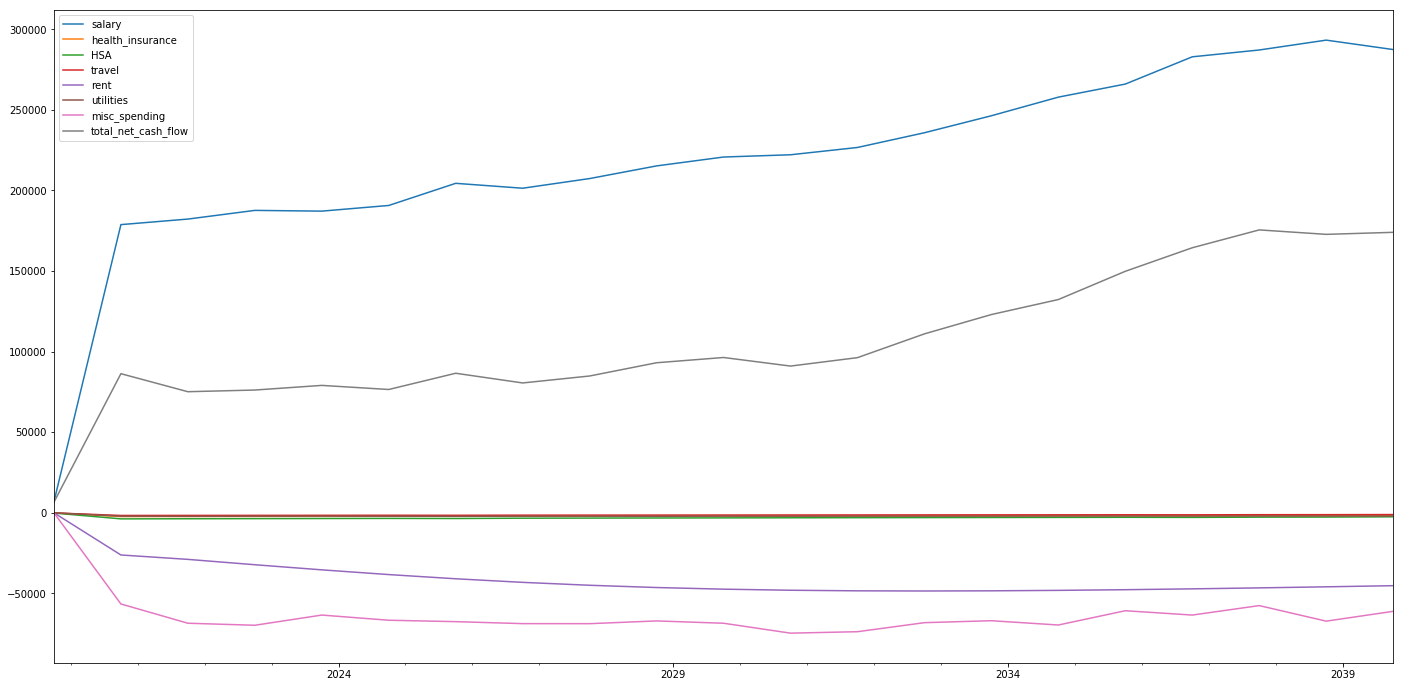

In [76]:
a.as_df.resample('12M').sum().plot(figsize=(24,12))

/Users/davidbrodsky/repos/gameplan/gameplan/gp_collections.py:43: UserWarning: Label 'cash_inflows' already exists. Will overwrite.
  warnings.warn(warning_message)
/Users/davidbrodsky/repos/gameplan/gameplan/gp_collections.py:43: UserWarning: Label 'cash_outflows' already exists. Will overwrite.
  warnings.warn(warning_message)


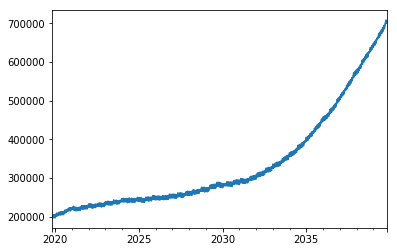

In [59]:
port.cash_savings.plot()

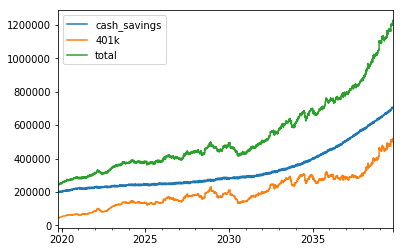

In [70]:
port.assets.generate_path_df().plot()

In [ ]:
port.

In [73]:
a.as_df

,salary,health_insurance,HSA,travel,rent,utilities,misc_spending,total_net_cash_flow
2019-10-25,6923.076923,-90.000000,-145.830000,-63.500000,0.000000,0.000000,0.000000,6623.746923
2019-11-01,0.000000,0.000000,0.000000,0.000000,-2200.000000,-186.944550,-4724.862509,-7111.807059
2019-11-08,6917.823966,-89.931712,-145.719350,-63.451819,0.000000,0.000000,0.000000,6618.721085
2019-11-22,6912.574994,-89.863475,-145.608784,-63.403674,0.000000,0.000000,0.000000,6613.699061
2019-12-01,0.000000,0.000000,0.000000,0.000000,-2196.424537,-176.881757,-5205.518040,-7578.824334
2019-12-06,6907.330005,-89.795290,-145.498302,-63.355566,0.000000,0.000000,0.000000,6608.680847
2019-12-20,6902.088996,-89.727157,-145.387903,-63.307494,0.000000,0.000000,0.000000,6603.666441
2020-01-01,0.000000,0.000000,0.000000,0.000000,-2192.735996,-167.532958,-5554.312233,-7914.581188
2020-01-03,6896.851963,-89.659076,-145.277589,-63.259459,0.000000,0.000000,0.000000,6598.655840
2020-01-17,6891.618904,-89.591046,-145.167358,-63.211460,0.000000,0.000000,0.000000,6593.649040


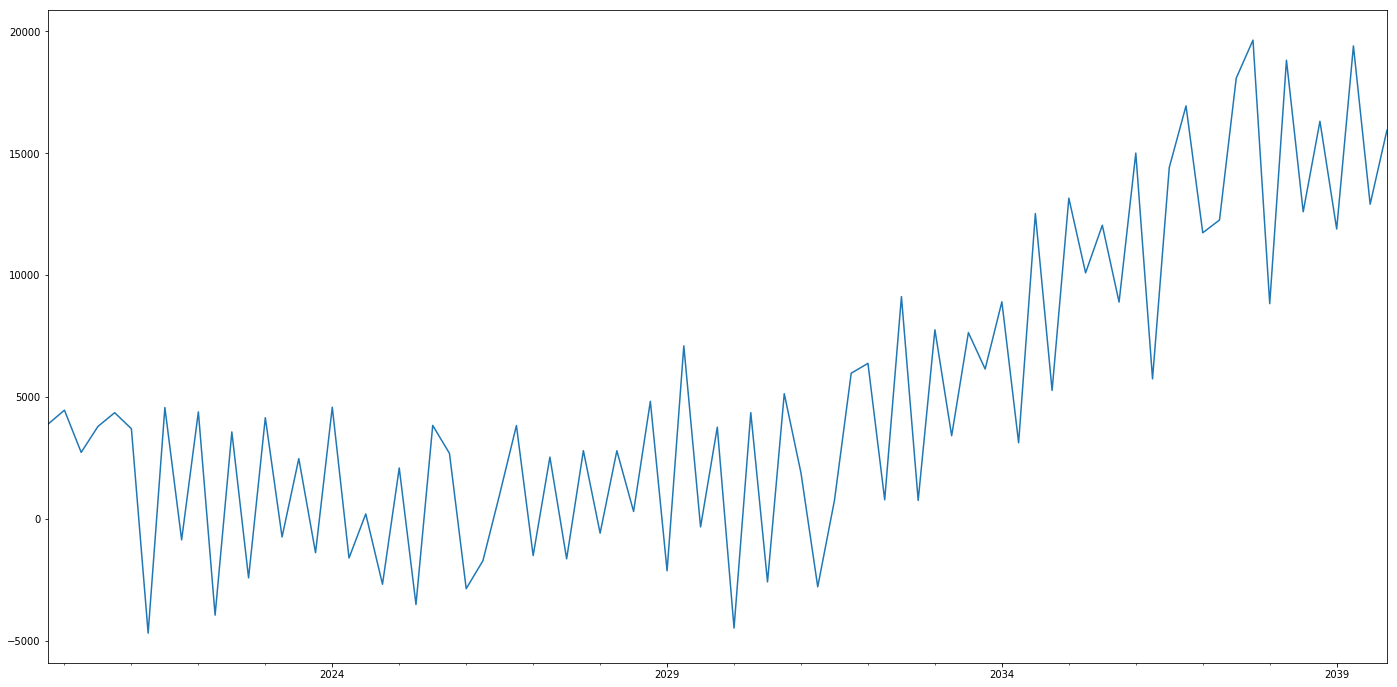

In [68]:
port.net_cashflows.resample('3M').sum().plot(figsize=(24,12))